In [74]:
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 


def plot_this_3Dcube(X):
 ax.scatter(X[0,:],X[1,:],X[2,:], c = 'r')

 for i in range(XM.shape[1]):
  ax.scatter(XM[0,i], XM[1,i],XM[2,i])

  for i in range(XM.shape[1]):
   ax.text(XM[0,i], XM[1,i],XM[2,i],str(i))

 ax.plot([XM[0][0],XM[0][1]],[XM[1][0],XM[1][1]],[XM[2][0],XM[2][1]]);
 ax.plot([XM[0][1],XM[0][2]],[XM[1][1],XM[1][2]],[XM[2][1],XM[2][2]]);
 ax.plot([XM[0][2],XM[0][3]],[XM[1][2],XM[1][3]],[XM[2][2],XM[2][3]]);
 ax.plot([XM[0][3],XM[0][0]],[XM[1][3],XM[1][0]],[XM[2][3],XM[2][0]]);

 ax.plot([XM[0][4],XM[0][5]],[XM[1][4],XM[1][5]],[XM[2][4],XM[2][5]]);
 ax.plot([XM[0][5],XM[0][6]],[XM[1][5],XM[1][6]],[XM[2][5],XM[2][6]]);
 ax.plot([XM[0][6],XM[0][7]],[XM[1][6],XM[1][7]],[XM[2][6],XM[2][7]]);
 ax.plot([XM[0][7],XM[0][4]],[XM[1][7],XM[1][4]],[XM[2][7],XM[2][4]]);

 ax.plot([XM[0][2],XM[0][6]],[XM[1][2],XM[1][6]],[XM[2][2],XM[2][6]]);
 ax.plot([XM[0][0],XM[0][4]],[XM[1][0],XM[1][4]],[XM[2][0],XM[2][4]]);
 ax.plot([XM[0][3],XM[0][7]],[XM[1][3],XM[1][7]],[XM[2][3],XM[2][7]]);
 ax.plot([XM[0][1],XM[0][5]],[XM[1][1],XM[1][5]],[XM[2][1],XM[2][5]]);

 ax.plot([XM[0][1],XM[0][8]],[XM[1][1],XM[1][8]],[XM[2][1],XM[2][8]]);
 ax.plot([XM[0][2],XM[0][8]],[XM[1][2],XM[1][8]],[XM[2][2],XM[2][8]]);
 ax.plot([XM[0][5],XM[0][8]],[XM[1][5],XM[1][8]],[XM[2][5],XM[2][8]]);
 ax.plot([XM[0][6],XM[0][8]],[XM[1][6],XM[1][8]],[XM[2][6],XM[2][8]]);

# cube coordinates list of list
p = [[0,0,0],[1,0,0],[1,0,1],[0,0,1],[0,1,0],[1,1,0],[1,1,1],[0,1,1]]

X = np.array([[0,0,0],[1,0,0],[1,0,1],[0,0,1],[0,1,0],[1,1,0],[1,1,1],[0,1,1],[1.5,0.5,0.5]])


# Plot cube 3D

World Coordinates 3D:
 [[0.  1.  1.  0.  0.  1.  1.  0.  1.5]
 [0.  0.  0.  0.  1.  1.  1.  1.  0.5]
 [0.  0.  1.  1.  0.  0.  1.  1.  0.5]]


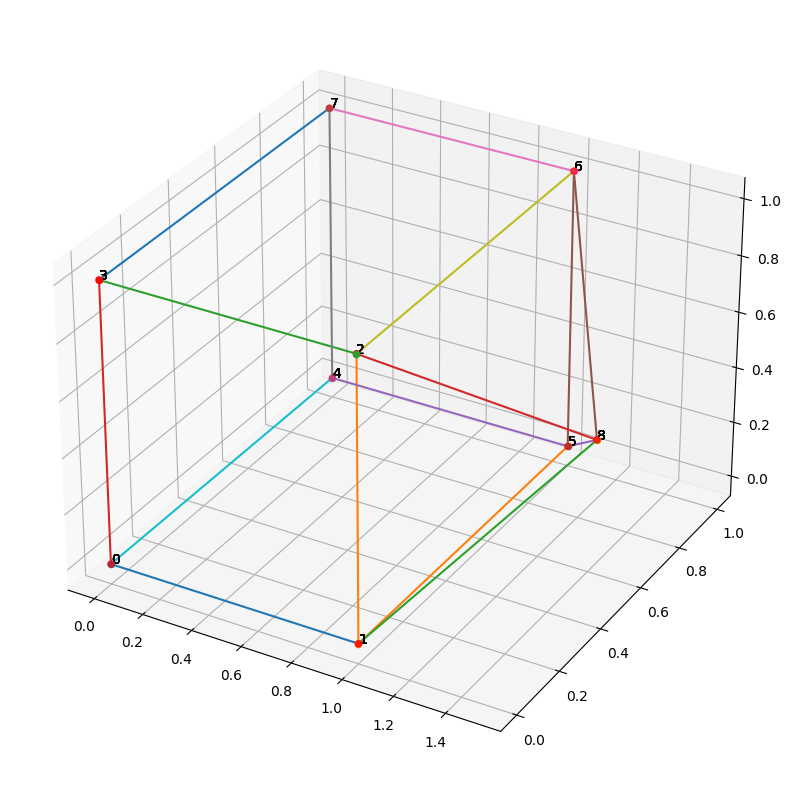

In [103]:

# points columns vectors
XM = X.transpose()

print("World Coordinates 3D:\n",XM)

# plotting 3D cube https://likegeeks.com/3d-plotting-in-python/
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
plot_this_3Dcube(XM)

plt.show()

In [104]:
#focal length
f = 5
fl = np.array([[f,0,0],[0,f,0],[0,0,1]])

# rotation matrix around Z-axis by 30 degree
cos30 = np.cos(np.deg2rad(30))
sin30 = np.sin(np.deg2rad(30))
rotation = np.array([[cos30, -sin30, 0], [sin30, cos30, 0], [0,0,1]])

#origin of the camera coordinate frame is at
translation = np.array([0,1,-10])

# convert row wise point to column wise points
XT = X.transpose()

In [105]:
rotation_applied = np.dot(rotation, XT)
# print(rotation_applied)
camera_coordinate = rotation_applied + translation.transpose().reshape((3,1))

In [106]:
ones = np.ones((1,camera_coordinate.shape[1]))

In [107]:
camera_to_homogenious = np.append(camera_coordinate, ones, axis=0)

In [108]:
projection_matrix = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0]])

In [109]:
intr_mediate_coordinate = np.dot(projection_matrix, camera_to_homogenious)

In [110]:
focal_length_multiplied = np.dot(fl, intr_mediate_coordinate)

In [111]:
image_plane = np.zeros((camera_coordinate.shape[1],2))
for i in range(focal_length_multiplied.shape[1]):
  image_plane[i,0] = focal_length_multiplied[0,i] / focal_length_multiplied[2,i]
  image_plane[i,1] = focal_length_multiplied[1,i] / focal_length_multiplied[2,i]

### Points in 2D

In [112]:
image_plane

array([[-0.        , -0.5       ],
       [-0.4330127 , -0.75      ],
       [-0.48112522, -0.83333333],
       [-0.        , -0.55555556],
       [ 0.25      , -0.9330127 ],
       [-0.1830127 , -1.1830127 ],
       [-0.20334745, -1.31445856],
       [ 0.27777778, -1.03668078],
       [-0.55212532, -1.14895405]])

In [113]:
def plot_this_2Dcube(XM):
 ax.scatter(image_plane[:,0],image_plane[:,1], c = 'r')
 ax.scatter(image_plane[0,0],image_plane[0,1],marker='X' ,c = 'r',s=50)

 for i in range(XM.shape[1]):
  ax.scatter(XM[0,i], XM[1,i])

 for i in range(XM.shape[1]):
  ax.text(XM[0,i], XM[1,i],str(i))

 ax.plot([XM[0][0],XM[0][1]],[XM[1][0],XM[1][1]]);
 ax.plot([XM[0][1],XM[0][2]],[XM[1][1],XM[1][2]]);
 ax.plot([XM[0][2],XM[0][3]],[XM[1][2],XM[1][3]]);
 ax.plot([XM[0][3],XM[0][0]],[XM[1][3],XM[1][0]]);

 ax.plot([XM[0][4],XM[0][5]],[XM[1][4],XM[1][5]]);
 ax.plot([XM[0][5],XM[0][6]],[XM[1][5],XM[1][6]]);
 ax.plot([XM[0][6],XM[0][7]],[XM[1][6],XM[1][7]]);
 ax.plot([XM[0][7],XM[0][4]],[XM[1][7],XM[1][4]]);

 ax.plot([XM[0][2],XM[0][6]],[XM[1][2],XM[1][6]]);
 ax.plot([XM[0][0],XM[0][4]],[XM[1][0],XM[1][4]]);
 ax.plot([XM[0][3],XM[0][7]],[XM[1][3],XM[1][7]]);
 ax.plot([XM[0][1],XM[0][5]],[XM[1][1],XM[1][5]]);
 #
 ax.plot([XM[0][1],XM[0][8]],[XM[1][1],XM[1][8]]);
 ax.plot([XM[0][2],XM[0][8]],[XM[1][2],XM[1][8]]);
 ax.plot([XM[0][5],XM[0][8]],[XM[1][5],XM[1][8]]);
 ax.plot([XM[0][6],XM[0][8]],[XM[1][6],XM[1][8]]);

### Plot cube in Image Plane

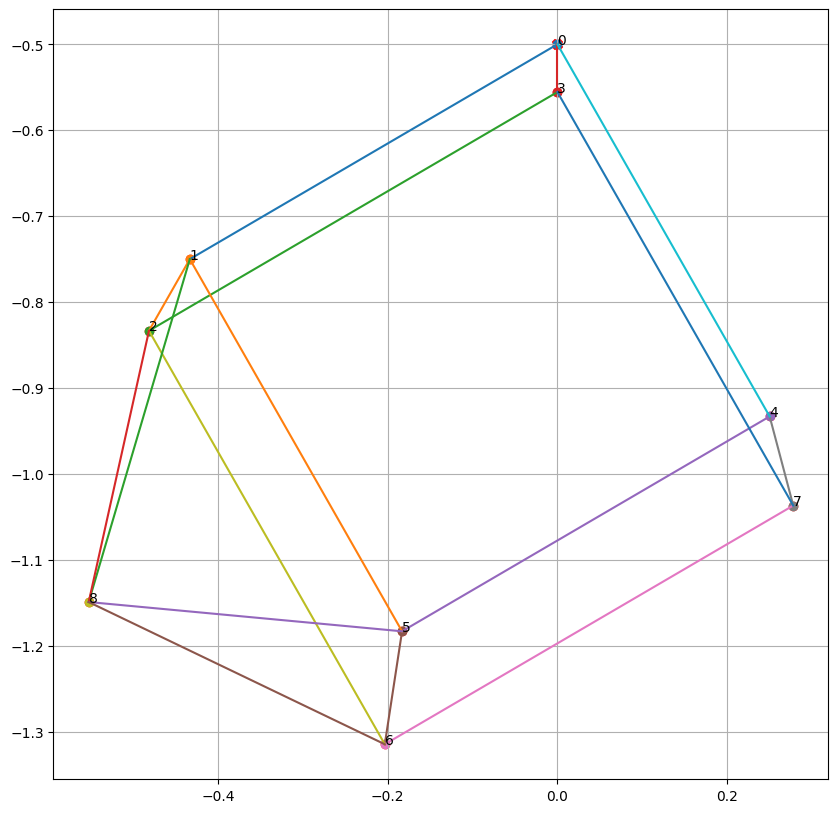

In [115]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.grid()
# print("Image Coordinates 2D:\n",image_plane.transpose())
plot_this_2Dcube(image_plane.transpose())